In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent / "Results"); os.chdir(set_path)

In [2]:
from IPython.display import Image

In [3]:
os.listdir()

['mogdog__64dim_ReverseIAF_epochs100000_flowsteps20_dist4__2021_07_17-04_01_32_PM',
 'mogdog__64dim_ReverseIAF_epochs100000_flowsteps20_dist10__2021_07_17-01_35_39_PM',
 'mogdog__64dim_ReverseIAF_epochs100000_flowsteps20_dist6__2021_07_17-01_31_15_PM',
 'mogdog_AdamW__64dim_ReverseIAF_epochs100000_flowsteps20_dist6__2021_07_18-10_49_14_AM',
 'Dino_1e4batch__ManyWell32dim_ReverseIAF_epochs20000_flowsteps20_dist4__2021_07_22-10_19_49_PM__trainAISparamsTrue',
 'mogdog__16dim_ReverseIAF_epochs100000_flowsteps20_dist3__2021_07_18-12_01_36_AM',
 'mogdog_AdamW_lower_lr_bigger_batch__64dim_ReverseIAF_epochs100000_flowsteps20_dist6__2021_07_18-06_21_44_PM',
 'mogdog__32dim_ReverseIAF_epochs100000_flowsteps20_dist10__2021_07_17-03_55_54_PM',
 'mogdog_AdamW_bigger_batch__64dim_ReverseIAF_epochs50000_flowsteps20_dist6__2021_07_19-08_06_47_PM',
 'mogdog_AdamW_lower_lr_bigger_batch__64dim_ReverseIAF_epochs30000_flowsteps20_dist10__2021_07_18-07_17_50_PM',
 'Dino_big_batch_higher_lr__ManyWell64dim_Re

In [4]:
sub_dir = "mogdog__32dim_ReverseIAF_epochs100000_flowsteps20_dist4__2021_07_18-12_07_07_AM"
#'mogdog__64dim_ReverseIAF_epochs100000_flowsteps20_dist6__2021_07_17-01_37_32_PM'
#'mogdog__16dim_ReverseIAF_epochs100000_flowsteps20_dist3__2021_07_18-12_01_36_AM' # 16 dim get's to 80% ESS
# "mogdog__32dim_ReverseIAF_epochs100000_flowsteps20_dist4__2021_07_18-12_07_07_AM" # 32 dim get's to 15% ESS

In [5]:
os.listdir(sub_dir)

['plots_AIS_samples_final.png',
 'model',
 'training',
 'results.txt',
 'plots_flo_samples_final.png',
 'model_info.txt',
 'histories.png']

In [6]:
text= open(sub_dir + '/results.txt', "r").readlines()
text

['*********     Parameters      *******************\n',
 '\n',
 'dim 32\n',
 'save_path Results/mogdog__32dim_ReverseIAF_epochs100000_flowsteps20_dist4__2021_07_18-12_07_07_AM\n',
 'epochs 100000\n',
 'n_flow_steps 20\n',
 'n_distributions 4\n',
 'flow_type ReverseIAF\n',
 'batch_size 1000\n',
 'seed 0\n',
 'n_samples_expectation 100000\n',
 'save True\n',
 'n_plots 20\n',
 'train_AIS_params False\n',
 'step_size 1.0\n',
 "learnt_dist_kwargs {'lr': 0.0005, 'optimizer': 'AdamW'}\n",
 '\n',
 '\n',
 ' *******************************    Results ********************* \n',
 '\n',
 'ESS of AIS before training is 2.5498554412717685e-05 calculated using 100000 samples \n',
 'ESS for samples from AIS  0.15652403997014866 calculated using 100000 samples \n',
 'ESS for samples from AIS of repeat calc 0.14922161226710445 calculated using 100000 samples \n',
 'ESS of flow model after training is 0.07023827645080252 calculated using 100000 samples']

In [7]:
training_dir = sub_dir + '/training'

In [8]:
pics = os.listdir(training_dir)
pics

['Resampled_epoch55000.png',
 'Samples_from_flow_epoch25000.png',
 'Samples_from_AIS_epoch50000.png',
 'Resampled_epoch80000.png',
 'Samples_from_AIS_epoch5000.png',
 'Samples_from_flow_epoch55000.png',
 'Samples_from_AIS_epoch60000.png',
 'Samples_from_flow_epoch85000.png',
 'Samples_from_AIS_epoch65000.png',
 'Samples_from_flow_epoch40000.png',
 'Resampled_epoch15000.png',
 'Samples_from_AIS_epoch95000.png',
 'Samples_from_flow_epoch75000.png',
 'Resampled_epoch75000.png',
 'Samples_from_AIS_epoch35000.png',
 'Samples_from_flow_epoch50000.png',
 'Samples_from_AIS_epoch90000.png',
 'Samples_from_AIS_epoch80000.png',
 'Resampled_epoch40000.png',
 'Samples_from_AIS_epoch15000.png',
 'Resampled_epoch85000.png',
 'Samples_from_flow_epoch15000.png',
 'Resampled_epoch50000.png',
 'Samples_from_flow_epoch0.png',
 'Resampled_epoch30000.png',
 'Samples_from_AIS_epoch0.png',
 'Resampled_epoch45000.png',
 'Samples_from_flow_epoch90000.png',
 'Resampled_epoch5000.png',
 'Samples_from_AIS_epoch300

In [9]:
epoch = 1000

## Samples from Flow

In [ ]:
Image(training_dir + f"/Samples_from_flow_epoch{epoch}.png")

# Samples from AIS

In [ ]:
Image(training_dir + f"/Samples_from_AIS_epoch{epoch}.png")

# Resampled

In [ ]:
Image(training_dir + f"/Resampled_epoch{epoch}.png")

# Training

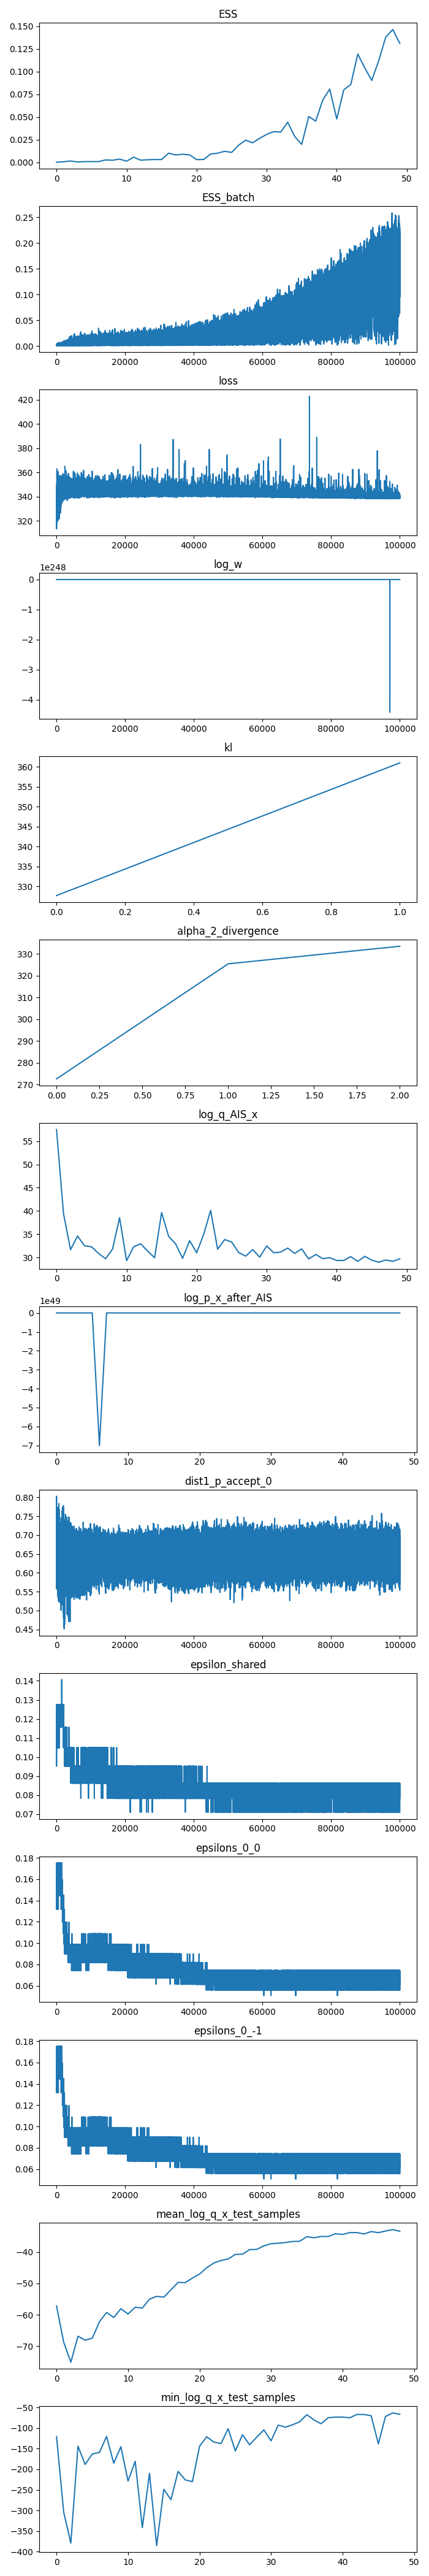

In [10]:
Image(sub_dir + '/histories.png')

# Marginals

In [11]:
import itertools
def plot_marginals_many_well(learnt_dist_manager, n_samples=1000, bounds=([-3, 3], [-3, 3]),
                                       n_points_contour=100, title=None, samples_q=None,
                                       log_prob_contour=True, clamp_samples=10, alpha=0.2):
    if samples_q is None:
        samples_q = learnt_dist_manager.learnt_sampling_dist.sample((n_samples,))
    samples_q = torch.clamp(samples_q, -clamp_samples, clamp_samples).cpu().detach().numpy()
    fig, axs = plt.subplots(learnt_dist_manager.target_dist.dim, learnt_dist_manager.target_dist.dim, 
                            figsize=(3*learnt_dist_manager.target_dist.dim, 3 * learnt_dist_manager.target_dist.dim), sharex="row", sharey="row")
    for i in range(learnt_dist_manager.target_dist.dim):
        for j in range(learnt_dist_manager.target_dist.dim):
            if i != j:
                axs[i, j].plot(samples_q[:, i], samples_q[:, j], "o", alpha=alpha)
    if title is not None:
        fig.suptitle(title)
    plt.tight_layout()

In [12]:
cwd_path = Path.cwd(); set_path = str(cwd_path.parent); os.chdir(set_path)

In [13]:
os.listdir()

['Utils',
 'Notebooks',
 'LikelihoodTrain',
 'Miscellaneous',
 '.git',
 '.gitignore',
 'ImportanceSampling',
 'README.md',
 'AIS_train',
 'TargetDistributions',
 'FittedModels',
 'NormalisingFlow',
 'Results',
 '.idea']

In [14]:
from AIS_train.train_AIS import AIS_trainer
from TargetDistributions.DoubleWell import ManyWellEnergy
from FittedModels.Models.FlowModel import FlowModel

In [15]:
text

['*********     Parameters      *******************\n',
 '\n',
 'dim 32\n',
 'save_path Results/mogdog__32dim_ReverseIAF_epochs100000_flowsteps20_dist4__2021_07_18-12_07_07_AM\n',
 'epochs 100000\n',
 'n_flow_steps 20\n',
 'n_distributions 4\n',
 'flow_type ReverseIAF\n',
 'batch_size 1000\n',
 'seed 0\n',
 'n_samples_expectation 100000\n',
 'save True\n',
 'n_plots 20\n',
 'train_AIS_params False\n',
 'step_size 1.0\n',
 "learnt_dist_kwargs {'lr': 0.0005, 'optimizer': 'AdamW'}\n",
 '\n',
 '\n',
 ' *******************************    Results ********************* \n',
 '\n',
 'ESS of AIS before training is 2.5498554412717685e-05 calculated using 100000 samples \n',
 'ESS for samples from AIS  0.15652403997014866 calculated using 100000 samples \n',
 'ESS for samples from AIS of repeat calc 0.14922161226710445 calculated using 100000 samples \n',
 'ESS of flow model after training is 0.07023827645080252 calculated using 100000 samples']

In [18]:
# 32 dim
dim = 32
flow_type="ReverseIAF"
n_flow_steps = 20
step_size = 1.0
n_distributions = 4
learnt_dist_kwargs = {'lr': 0.0005, 'optimizer': 'AdamW'}
train_AIS_params = False

In [17]:
# 16 dim
dim = 16
flow_type="ReverseIAF"
n_flow_steps = 20
step_size = 1.0
n_distributions = 3
learnt_dist_kwargs = {'lr': 0.001, 'optimizer': 'AdamW'}
train_AIS_params = False

In [ ]:
target = ManyWellEnergy(dim=dim, a=-0.5, b=-6)
learnt_sampler = FlowModel(x_dim=dim, scaling_factor=2.0, flow_type=flow_type,
                               n_flow_steps=n_flow_steps)
tester = AIS_trainer(target, learnt_sampler, loss_type=False, n_distributions=n_distributions
                     , n_steps_transition_operator=1,
                     step_size=step_size, transition_operator="HMC", learnt_dist_kwargs=learnt_dist_kwargs,
                     loss_type_2="alpha_2", train_AIS_params=train_AIS_params, inner_loop_steps=5)

In [ ]:
tester.learnt_sampling_dist.load_model(cwd_path.parent / "Results/" / sub_dir)

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
plot_marginals_many_well(tester)